In [1]:
library(ggplot2)

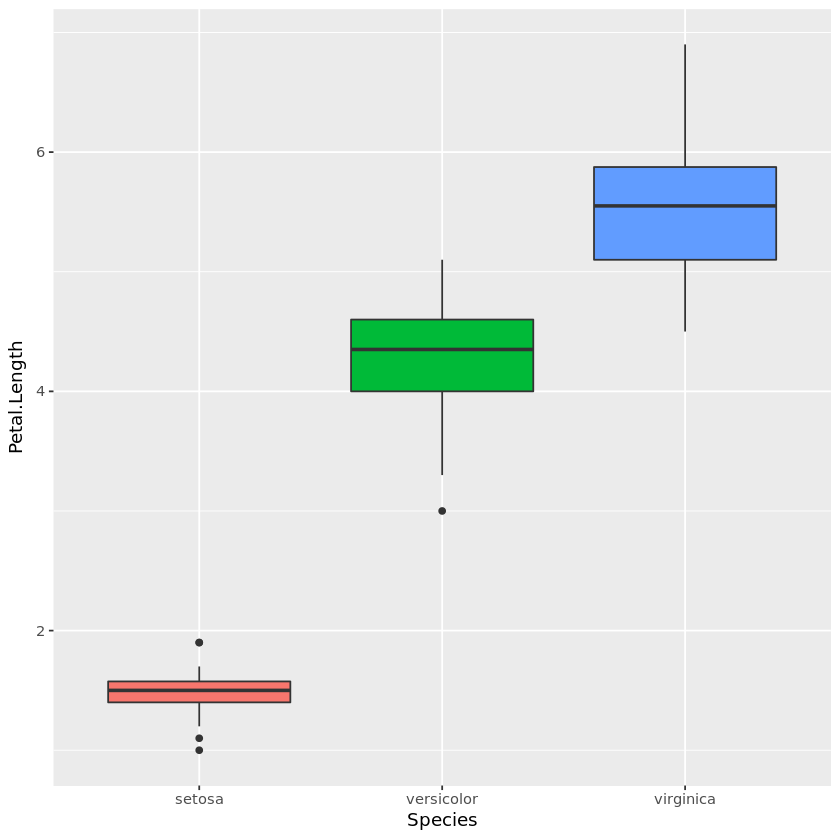

In [3]:
ggplot(iris) +
    geom_boxplot(aes(x = Species, y = Petal.Length, fill = Species)) +
    theme(legend.position = "none")